# Part 1: Binning degree distributions
##  A. Binning real numbers

**Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with $\mu = 2$  and $\sigma = 0.125$.
Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?
Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import networkx as nx
import numpy as np
import collections
import math
from numpy import random
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [13]:
random.seed(123)
data = random.normal(loc=2, scale=0.125, size=5000) 


In [14]:
hist_values, bin_edges = np.histogram(data, bins = 10)

In [15]:
print("Histogram values: ", hist_values)
print("Bin edges: ", bin_edges)
print(f"Length of first array: {len(hist_values)},\nLength of second array: {len(bin_edges)}")

Histogram values:  [   6   34  227  680 1268 1412  937  347   84    5]
Bin edges:  [1.52482773 1.61698969 1.70915166 1.80131363 1.8934756  1.98563756
 2.07779953 2.1699615  2.26212347 2.35428543 2.4464474 ]
Length of first array: 10,
Length of second array: 11


**What does the numpy.histogram function return? Do the two arrays have the same length?** 

As we can see in the cells above, the numpy.histogram function returns a numerical representation of a histogram since it returns two arrays: the first array indicate the frequency of datapoints within a certain width defined by the number of bins while the second array represents the bin edges. Since here we chose 10 bins to split the data, we will have that the first bar contains 12 data points that are in the range 1.54 and 1.64 (excluded), 30 in the range between 1.57 and 1.67 (excluded), and so on. So since each bin has a left and a right edge this will result in an array that is one point longer. 

**Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

In order to produce a plot that resembled an histogram with the binned data we added a zero in the zeroth position of the count values so that we could model the shape of this step graph like an histogram.

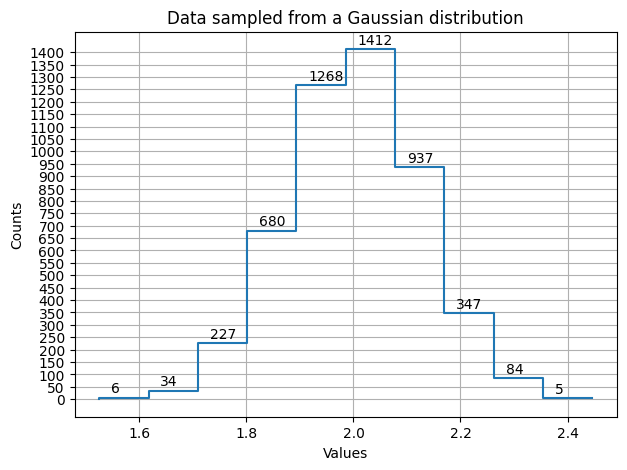

In [16]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()

ax.plot(bin_edges, np.insert(hist_values, 0, 0), drawstyle = 'steps')

plt.xlabel("Values")
plt.ylabel("Counts")
plt.title("Data sampled from a Gaussian distribution")
plt.yticks(np.arange(0, max(hist_values)+1, 50))
offsetx = -0.07 
offsety = 20
for x, y in zip(bin_edges[1:], np.insert(hist_values, 0, 0)[1:]):
      plt.annotate(y, (x+offsetx,y+offsety))
ax.grid()
plt.show()


## B. Binning integers

**But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.**

In [17]:
random.seed(123)
data2 = np.random.poisson(lam=10, size=5000)
min2 = np.min(data2)
max2 = np.max(data2)
print("Min value:",min2, "\nMax value:", max2)

Min value: 1 
Max value: 23


**Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how numpy.histogram deals with the smallest an largest value in particular; is it correct to set the first entry of  to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting numpy.histogram's bin parameter as bin = $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**

In order to create a vector $v$ that results in a binning that puts each integer value in its own bin it is only necessary to create a vector that ranges between the minimum value (included) and the maximum value+1 (included). The way that np.histogram() works indeed is that each bin includes the left edge but excludes the right edge except for the last bin that includes both left edge and right edge. So in order to contain only the maximum value in the last bin, the last bin edges should be defined as (maximum value, maximum value +1). 

In [18]:
v =  np.array(range(min2, max2+2))
hist_values, bin_edges = np.histogram(data2, bins=v) 


In [19]:
print(f"Sum over bin counts: {np.sum(hist_values)}")  #CORRECT because it is equal to the total number of points 

Sum over bin counts: 5000


**Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution**

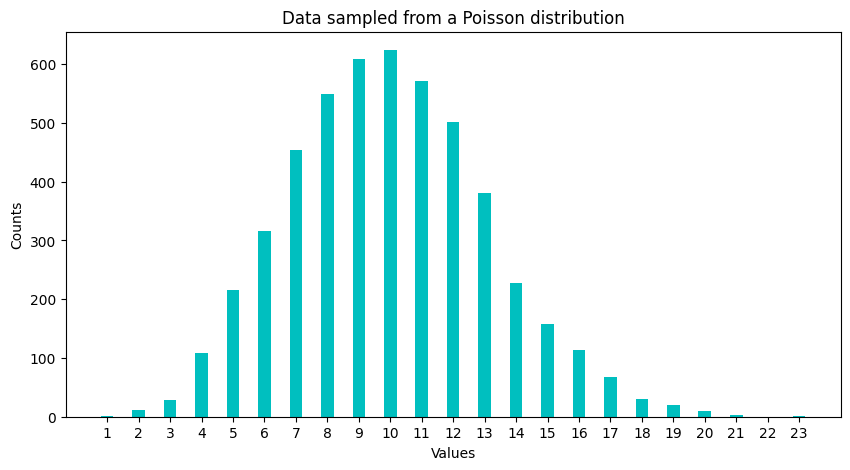

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
idx = np.array(range(min2, max2+1))
plt.bar(bin_edges[:-1], hist_values, color ='c',
        width = 0.4)
ax.set_xticks(idx)
plt.xlabel("Values")
plt.ylabel("Counts")
plt.title("Data sampled from a Poisson distribution")
plt.show()

## C. Binning and plotting degree distributions.

**Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters ($N$ and $p$) should assume. It's easy to see that $N = 5000$, but how do you find $p$? Hint: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $k = p(N-1)$ , which will give you $p$.**

Given that $p = \frac{k}{N-1}$:

In [21]:
k = 10
N = 5000
p = k/(N-1)

In [64]:
print("p will be: ", p)

p will be:  0.2


**Now, use networkx to create the graph and extract the degree distribution.**

In [23]:
er = nx.erdos_renyi_graph(N, p)

In [24]:
degrees = list(zip(*er.degree()))[1] #extract only the value for the degrees of the graph 
degree_dist = dict(collections.Counter(degrees))


**Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

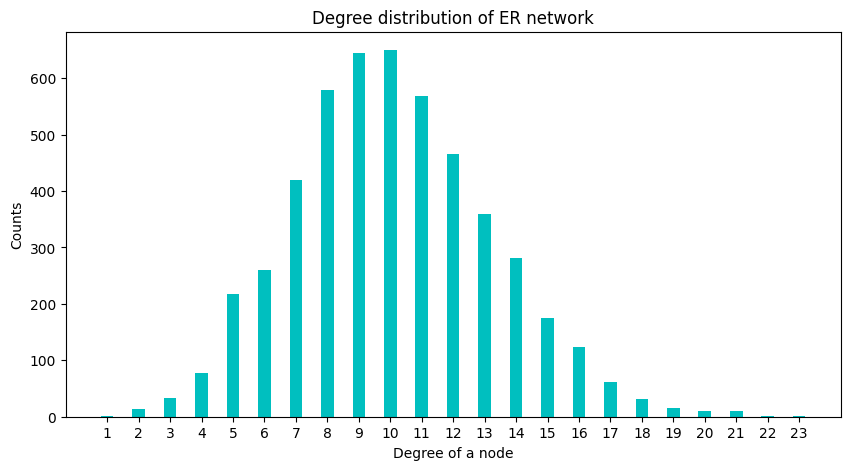

In [25]:
dmax = max(degree_dist)
dmin = min(degree_dist)

fig, ax = plt.subplots(figsize = (10, 5))

plt.bar(degree_dist.keys(), degree_dist.values(), color ='c',
        width = 0.4)
ax.set_xticks(np.array(range(dmin, dmax+1)))
plt.xlabel("Degree of a node")
plt.ylabel("Counts")
plt.title("Degree distribution of ER network")
plt.show()

# Part 2: Random networks and plotting in networkx
## A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

**3.1. Erdős-Rényi Networks
Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10–3.**

**(a) What is the expected number of links, 〈L〉?**

Average Number of Links: $⟨L⟩ = \frac{pN(N−1)}{2}$

In [26]:
p = 10**(-3)
n = 3000
k = p*(n-1) 
L = (k*n)/2
print(L)

4498.5


**(b) In which regime is the network?**
Supercritical Regime: ‹k› › 1

In [27]:
print(k)

2.999


**(c) Calculate the probability $p_c$ so that the network is at the critical point**

The network is at critical point when ‹k› = 1. So $p_c = \frac{1}{N-1} $

In [28]:
p_c = 1/(n-1)
print(p_c)

0.00033344448149383126


**(d) Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{CI}$ so that the network has only one component.** 

When $ p = \frac{lnN}{N}$ the network has only one giant component. Since it was analytically impossible to extract the N by this expression, we tried a series of guesses to find its value and this is the result:

In [29]:
assert(np.around(math.log(9100)/9100, 3) == 10**(-3))
n_ci = 9100

**(e) For the network in (d), calculate the average degree 〈$k^{cr}$〉 and the average distance between two randomly chosen nodes 〈d〉**.

Given that a network becomes connected when $k = lnN$ and that the average distance <d> is $d ≈ \frac{lnN}{ln⟨k⟩}$, we can calculate $k^{cr}$ and 〈d〉 as : 

In [30]:
k = math.log(n_ci)
d = k / math.log(k)
print(k)
print(d)

9.116029692504942
4.124836166429778


**(f) Calculate the degree distribution $p_{k}$ of this network (approximate with a Poisson degree distribution).**

In [31]:
degrees = np.zeros(n+1, dtype = int)
mu = k
for i in range(0, 3001):
    degrees[i]=poisson.rvs(mu) #to collect the degrees

In [32]:
counter = dict(collections.Counter(degrees))
list_distr = list(counter.items())
degree_dist = sorted(list_distr, 
       key=lambda x: x[0]) ##degree distribution
print("Degree distribution:",dict(degree_dist))

Degree distribution: {1: 2, 2: 9, 3: 28, 4: 81, 5: 167, 6: 270, 7: 347, 8: 357, 9: 424, 10: 367, 11: 303, 12: 232, 13: 171, 14: 90, 15: 67, 16: 48, 17: 17, 18: 12, 19: 4, 20: 1, 21: 2, 22: 1, 23: 1}


## B. Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

**Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)**

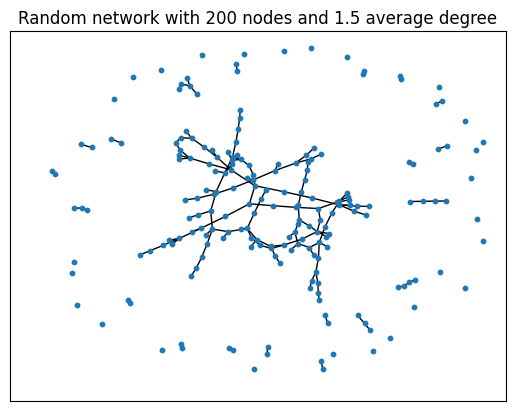

In [33]:
k = 1.5
n = 200
p = k/(n-1)

plt.figure()  
plt.title("Random network with 200 nodes and 1.5 average degree")
G = nx.erdos_renyi_graph(n, p, seed=123, directed=False)
nx.draw_networkx(G, node_size = 10, with_labels=False, linewidths=1)
plt.show()

In [34]:
largest_cc = max(nx.connected_components(G), key=len)
giant_c = G.subgraph(largest_cc)
print("Giant connected component: ", giant_c)

Giant connected component:  Graph with 111 nodes and 114 edges


**Choose a node at random from the GCC. (Hint: You may want to try random.choice.)**

In [35]:
random.seed(123)
random_node = random.choice(list(giant_c.nodes))

**Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)**

In [36]:
paths = nx.single_source_shortest_path_length(giant_c, random_node, cutoff=2)
print(paths)
def get_key(val, my_dict):
    keys = []
    for key, value in my_dict.items():
        if val == value:
            keys.append(key)
 
    return keys

print(f"List of nodes precisely 2 steps aways from node {random_node}:", get_key(2, paths))

{194: 0, 128: 1, 123: 1, 176: 1, 131: 2, 37: 2, 166: 2, 16: 2, 186: 2}
List of nodes precisely 2 steps aways from node 194: [131, 37, 166, 16, 186]


**Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully to find out how to color individual nodes.**

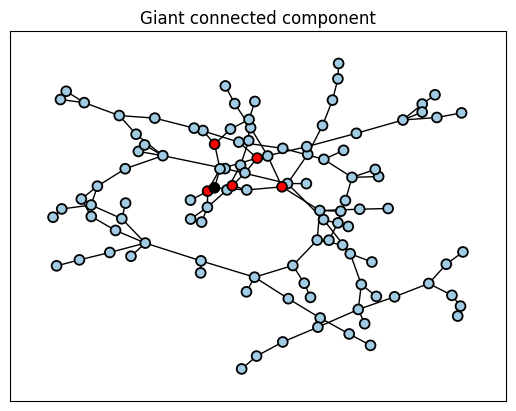

In [37]:
starting_node = get_key(0, paths)[0]
val_map = dict()
val_map[starting_node] = "#000000"
for node in get_key(2, paths):
    val_map[node] = "#ff0000"
    
plt.figure()  
plt.title("Giant connected component")
pos = nx.spring_layout(giant_c)
values = [val_map.get(node, "#A0CBE2") for node in giant_c.nodes()]
nodes=nx.draw_networkx_nodes(giant_c,pos, node_color = values, node_size = 50, linewidths=1.3, edgecolors = "black")
edges = nx.draw_networkx_edges(giant_c, pos)
plt.show()

# Part 3: Watts-Strogatz Networks
## A. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1 . Calculate the average shortest path length \<d> for each one. Describe what happens to the network when p = 1.

In [38]:
g1 = nx.watts_strogatz_graph(500, 4, 0)
g2 = nx.watts_strogatz_graph(500, 4, 0.1)
g3 = nx.watts_strogatz_graph(500, 4, 1)

In [39]:
print(f"Average shortest path length for graph one with p = 0: {nx.average_shortest_path_length(g1):.3}")
print(f"Average shortest path length for graph one with p = 0.1: {nx.average_shortest_path_length(g2):.3}")
print(f"Average shortest path length for graph one with p = 1: {nx.average_shortest_path_length(g3):.3}")

Average shortest path length for graph one with p = 0: 62.9
Average shortest path length for graph one with p = 0.1: 7.35
Average shortest path length for graph one with p = 1: 4.77


When $p = 1$ the rewiring probability is at maximum and that produces a situation in which random shortcuts appear from one side to the opposite inside the lattice even connecting nodes far from each others. That's the reason why the value of $<d>$ becomes so small compared to the other cases.

## B. Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with N = 500, \<k> = 4 , for each of p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}. Calculate the average of \<d> as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [40]:
def average_d_std(p):
    ls =[nx.average_shortest_path_length(nx.watts_strogatz_graph(500, 4, p)) for x in range(0, 50)]
    return np.average(ls), np.std(ls)

In [41]:
x = [0,0.01,0.03,0.05,0.1,0.2]
y = []
errors = []
for p in x:
    avg, std = average_d_std(p)
    y.append(avg)
    errors.append(std)

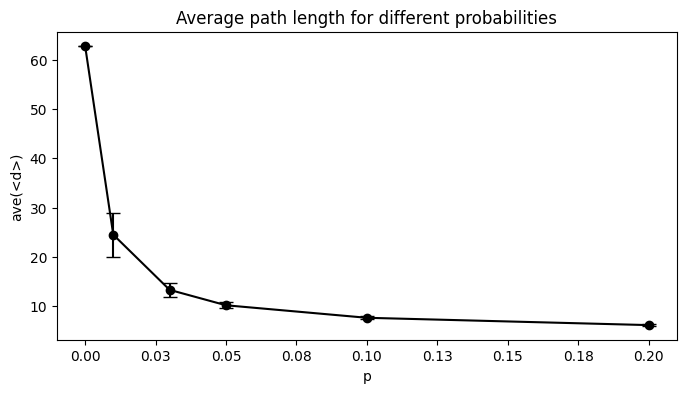

In [42]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x,y, marker = 'o', color= 'black')
ax.errorbar(x, y, yerr =errors, fmt='o', markersize=2, capsize=5, color="black")
ax.set_title('Average path length for different probabilities')
ax.set_xlabel("p")
ax.set_ylabel(r"ave(<d>)")
ax.xaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
plt.show()

# Part 4. The Barabasi-Albert Model
**We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success**

## A. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [43]:
random.seed(123)
ba = nx.Graph() # Following the book passages: "We start with an empty network"
ba.add_edge(1, 1) #"The first node can only link to itself, forming a self-loop."
ba.add_edge(2, np.random.choice([1,2], p = (2/3, 1/3))) #"Node 2 can either connect to node 1 with probability 2/3, or to itself with probability 1/3."
for i in range(3, 101):
    ba.add_edge(i, np.random.choice(list(np.array(ba.edges).flatten())+[i]))

In [44]:
print(ba)

Graph with 100 nodes and 100 edges


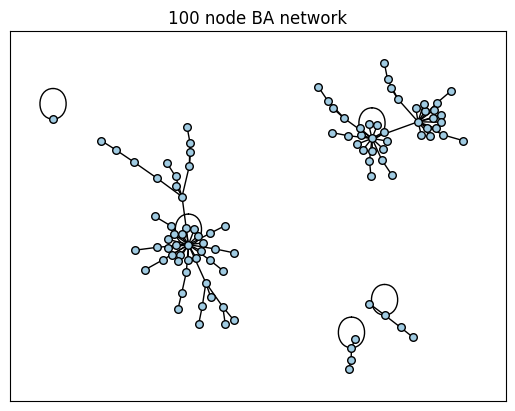

In [45]:
plt.figure()  
plt.title("100 node BA network")
pos = nx.spring_layout(ba)
nodes = nx.draw_networkx_nodes(ba, pos, node_size =30, edgecolors = "black", node_color = "#A0CBE2")
edges = nx.draw_networkx_edges(ba, pos)
plt.show()

## B. Now create a 5000 node network.

**What's the maximum and minimum degree?**

In [46]:
random.seed(123)
for i in range(101, 5001):
    ba.add_edge(i, np.random.choice(list(np.array(ba.edges).flatten())))

In [47]:
max_degree = sorted(ba.degree, key=lambda x: x[1], reverse=True)[0][1]
min_degree = sorted(ba.degree, key=lambda x: x[1], reverse=True)[-1][1]
print(f"Max degree: {max_degree}; Min degree: {min_degree};")

Max degree: 179; Min degree: 1;


**Now, bin the degree distribution, for example using numpy.histogram.**

In [48]:
bins = np.array(range(min_degree, max_degree+2))
count, bin_edges = np.histogram([x[1] for x in ba.degree], bins=bins)

**Plot the distribution. Plot it with both linear and log-log axes.**

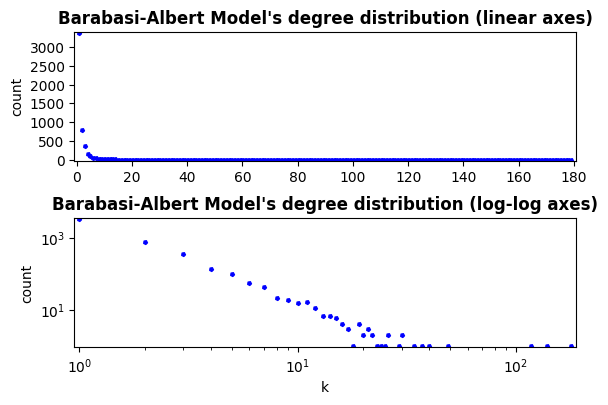

In [49]:
degrees = bin_edges[:-1]
fig, ax = plt.subplots(2,figsize=(6,4))
fig.tight_layout(pad=2.0)

ax[0].scatter(degrees, count, marker = (5, 0, 45), color= 'blue', s = 8)
ax[0].set_ylabel("count")
ax[0].set_xticks(np.arange(0, max(degrees)+20, 20))
ax[0].set_yticks(np.arange(0, max(count)+500, 500))

ax[1].scatter(degrees, count, marker = (5, 0, 45), color= 'blue', s= 8)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel("count")
ax[1].set_xlabel("k")

ax[0].set_title("Barabasi-Albert Model's degree distribution (linear axes)", 
             fontweight ="bold")
ax[1].set_title("Barabasi-Albert Model's degree distribution (log-log axes)", 
             fontweight ="bold")
ax[0].margins(x=0.01, y = 0.01)
ax[1].margins(x=0.01, y = 0.01)
plt.show()

# Part 5. Power-laws and the friendship paradox
**Next step is to explore the Friendship paradox. This paradox states that almost everyone has fewer friends than their friends have, on average*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network F-BA for friendship BA). Do the following:**
## A. The friendship paradox in BA networks
**Pick a node $i$ at random (e.g. use random.choice). Find its degree.**

In [50]:
random.seed(123)
i = random.choice(list(ba.nodes))

In [51]:
degree_i = ba.degree[i]

In [52]:
print("Degree of random node i: ",degree_i)

Degree of random node i:  1


**Find $i$'s neighbors. And calculate their average degree.**

In [53]:
avg_neigh = np.average([ba.degree[n] for n in ba.neighbors(i)])
print("Average degree of i's neighbors: ", avg_neigh)

Average degree of i's neighbors:  4.0


**Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$**.

In [54]:
assert(avg_neigh > degree_i)

**Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?**

In [55]:
random.seed(123)
true = 0
for times in range(1000):
    i = random.choice(list(ba.nodes))
    degree_i = ba.degree[i]
    if np.average([ba.degree[n] for n in ba.neighbors(i)]) > degree_i:
        true += 1
print(f"Friendship paradox was true {true} times, so {true/1000*100}% of the time")

Friendship paradox was true 856 times, so 85.6% of the time


**What if the power law is flatter, e.g.  with $\gamma$ = 1.5? Will the fraction of times the paradox is true be higher or lower?
First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?**

If the power law is flatter that means that the number of links connected to the largest hub could be as big as or even bigger than the size of the network. Thus that means that mostly all nodes are connected to the largest cluster which means that the friendship paradox will be true most of the times (more times than with the example of before) as the cluster with which most nodes are "friends with" is the nodes with more links in absolute terms.


In [56]:
def configuration(alfa):
    x_min = 1
    r = np.random.uniform(size = 5000)
    x = (x_min*(1-r)**(-1/alfa -1)).astype(int)
    if np.sum(x)%2 != 0: 
        x = np.append(x, 1)

    configuration = nx.configuration_model(x)
    return configuration

def friendship_paradox_rate(configuration, n_nodes):

    nodes = np.random.choice(list(configuration.nodes), size = n_nodes)
    degrees_nodes = [configuration.degree[node] for node in nodes]
    degree_friend = []
    for node in nodes:
        friend_list = []
        for neigh in list(configuration.neighbors(node)):
            friend_list += [configuration.degree[neigh]]
        degree_friend += [np.average(friend_list)]
    true = (sum(np.array(degree_friend)> np.array(degrees_nodes)))
    return true 

flatter_configuration = configuration(1.5)
rate = friendship_paradox_rate(flatter_configuration, 1000)
print(f"Friendship paradox was true {rate} times, so {rate/1000*100}% of the time")

Friendship paradox was true 1000 times, so 100.0% of the time


**Now generate a network for the configuration model that has the same slope and number of nodes as F-BA in 5.A above; let's call this new network F-CM (for friendship configuration model).**

As we know from the book: "The Barabasi model predicts $\gamma$  = 3 while the degree exponent of real networks varies between 2 and 5". In this case we can see that the slope of F-BA was 3.5:

γ = 3.528332733954172


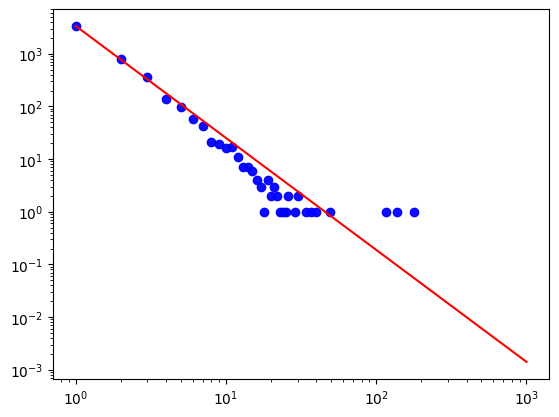

In [57]:
x = degrees
y = count
fig = plt.figure()
ax=plt.gca() 
ax.scatter(x,y,c="blue",alpha=0.95)
ax.set_yscale('log')
ax.set_xscale('log')
newX = np.logspace(0, 3, base=10)  # Makes a nice domain for the fitted curves.
                                   # Goes from 10^0 to 10^3
                                
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))
slope = math.log10(popt[0])
print(f"γ = {slope}")

**What fraction of the time is the friendship paradox is true for the F-CM network**

In [58]:
fcm_configuration = configuration(slope)
rate_fcm = friendship_paradox_rate(fcm_configuration, 1000)
print(f"Friendship paradox was true {rate_fcm} times, so {rate_fcm/1000*100}% of the time")



Friendship paradox was true 989 times, so 98.9% of the time


**Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).**

According to the paper "The friendship paradox in real and model networks" by Cantwell et al. the Friendship paradox tend to be stronger when networks are not degree assortative, i.e. by using the Wikipedia definition when nodes tend to be connected with other nodes with similar degree values. This result has an intuitive explanation because if there are smaller differences between a node's degree and the average degree of their friends then the frienship paradox holds less times. 
Regarding the clustering coefficient, it is likely that a higher global clustering coefficient impacts positively how often the friendship paradox holds because it denotes the probability that two neighbors of a randomly selected node are linked toghether thus the more connected they are the more likely the neighbors'average degree of that node can be higher than its degree. Community structure should be instead a factor that influences negatively the realization of the friendship paradox: if a network has a network structure then it will be grouped into communities that are formed of nodes densely connected between each others and scarsely connected with the other communities thus it is a similar situation as for the assorativity that there are less guarantees for a node to be connected with a hub. In general, both assortativity and community-structure are usually correlated with the absence of large well-defined clusters which are usually the origin of the frienship paradox given that nodes are more likely to be friends with hubs which in turn have more friends than the other nodes.

**How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)**

To test more rigorously if the friendship-paradox is true equally often in F-BA and F-CM, we should run different experiments by sampling a meaningful number (e.g 100) of different F-BA and F-CM realizations with the same parameters as before and then test for each of this samples how many times the friendship paradox is true over 1000 chosen random points. In this way it is actually possible to get a reliable estimate of the average true rate of the friendship paradox as well as an estimate of its standard deviation (used for the error-bars). After gathering this data is also possible to run a t-test to compare the two means and see if there is a statistically significant difference between the means of the two networks.

# Part 6. Growth without Preferential Attachment

**Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, but have the incoming nodes connect to the existing nodes with equal probability. Let's call this the Sune-network.**


In [59]:
random.seed(123)
sune = nx.Graph()
sune.add_node(1)
for i in range(2,5000):
    sune.add_edge(i, np.random.choice(list(sune.nodes)))


**Generate an ER network of same size and same p as the Sune-network**

In [60]:
er = nx.erdos_renyi_graph(5000, 1/5000)

**What are the differences between the ER network and the Sune-network? Explain in your own words**

The Sune-network presents more links than the ER network and it is connected while ER network is not. The shape of their degree distribution is similar but the Sune-network's degree distribution is more spread out. This because in the generation process of the Sune-network the probability for an incoming node to link to an existing node is equal for all the existing nodes, however this probability decreases iteratively. In fact, when the total number of existing nodes n = 1 the probability of linking to that unique node is 1, when n=2 the probability of connecting to one of the two nodes is p = 1/2, when n = 3 p = 1/3 is the probability of connecting to one of the three nodes and so on. This means that eventually the nodes that were already present in the network earlier on had higher probabilities of getting more links than nodes added later and this explains the difference in the dispersion. However, from a certain iteration this "advantage" property loosens so that we see that still most of the degree in the distribution correspond to the value 1 or 2 and not so many high degrees as in a scale-free network. Regarding the ER network, the number of links across nodes is more evenly distributed: the max degree in the Er network is 6 while in the Sune is 16. The difference lays in the generation of the networks: in the creation of the ER network, there is an iteration over all the possible unique node pairs and then each time a number between 0 and 1 is extracted. If that number exceeds p, then the two nodes are connected, otherwise there are not. This process does not benefit any node in particular and does not guarantees connectivity. For the Sune network instead it is guaranteed that the network will be connected since at each iteration the new added node must be linked to one of the existing nodes. 


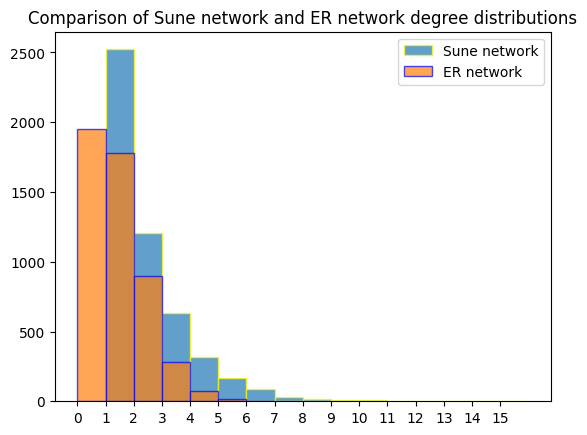

In [61]:
sune_degrees = [x[1] for x in sune.degree]
max_sune = sorted(sune_degrees, reverse=True)[0]
min_sune = sorted(sune_degrees)[0]
bins_su = np.array(range(min_sune, max_sune+2))

er_degrees = [x[1] for x in er.degree]
max_er= sorted(er_degrees, reverse=True)[0]
min_er = sorted(er_degrees)[0]
bins_er = np.array(range(min_er, max_er+2))

plt.hist(sune_degrees, edgecolor='yellow', bins=bins_su, label = "Sune network", alpha = 0.7)
plt.hist(er_degrees, edgecolor='blue', bins=bins_er, label = "ER network", alpha = 0.7)
plt.title("Comparison of Sune network and ER network degree distributions")
plt.legend(loc='upper right')
plt.xticks(np.arange(min(sune_degrees)-1, max(sune_degrees)+1, 1.0))

plt.show()

In [62]:
print("The Sune network is connected:", nx.is_connected(sune))
print("The ER network is connected:", nx.is_connected(er))
print(max_sune, max_er)

The Sune network is connected: True
The ER network is connected: False
15 6
